In [ ]:
!pip install PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import PyPDF2
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [ ]:
file_path = '/content/company.pdf'
with open(file_path, 'rb') as file:
  pdf_reader = PyPDF2.PdfReader(file)
  text = ''
  for page in pdf_reader.pages:
    text += page.extract_text()

text = text.split('\n')

In [ ]:
data = {
      'Sr No.': [],
      'Reference No (URN)': [],
      'Journal Date': [] ,
      'Date of Purchase': [],
      'Date of Expiry': [],
      'Name of the Purchaser': [],
      #'Prefix': [],
      'Bond Number': [] ,
      'Denominations by company': [],
      'Issue Branch Code': [] ,
      'Issue Teller': [],
      'Status': [],
    }

for line in text[3:]:
  line = line.split()
  if 'Page' in line or 'NumberDenominations' in line or 'PurchaseDate' in line or 'Reference' in line:
    continue
  data['Sr No.'].append(line[0])
  data['Journal Date'].append(line[1])
  data['Reference No (URN)'].append(line[2])
  data['Date of Purchase'].append(line[3])
  data['Date of Expiry'].append(line[4])
  t = ''
  for _ in line[5:-6]:
    t = t + _ + " "
  data['Name of the Purchaser'].append(t) #
  #data['Prefix'].append()
  data['Bond Number'].append(line[-6] + line[-5] )
  data['Denominations by company'].append(int(line[-4].replace(',', '')))
  data['Issue Branch Code'].append(line[-3])
  data['Issue Teller'].append(line[-2])
  data['Status'].append(line[-1])


doner = pd.DataFrame(data)
doner.head()

,Sr No.,Reference No (URN),Journal Date,Date of Purchase,Date of Expiry,Name of the Purchaser,Bond Number,Denominations by company,Issue Branch Code,Issue Teller,Status
0,1,12/Apr/2019,00001201904120000001166,12/Apr/2019,26/Apr/2019,A B C INDIA LIMITED,TL11448,1000000,00001,5899230,Paid
1,2,12/Apr/2019,00001201904120000001166,12/Apr/2019,26/Apr/2019,A B C INDIA LIMITED,TL11447,1000000,00001,5899230,Paid
2,3,12/Apr/2019,00001201904120000001166,12/Apr/2019,26/Apr/2019,A B C INDIA LIMITED,TL11441,1000000,00001,5899230,Paid
3,4,12/Apr/2019,00001201904120000001166,12/Apr/2019,26/Apr/2019,A B C INDIA LIMITED,OL1113,100000,00001,5899230,Paid
4,5,12/Apr/2019,00001201904120000001166,12/Apr/2019,26/Apr/2019,A B C INDIA LIMITED,OL1118,100000,00001,5899230,Paid


In [ ]:
doner.to_csv('temp.csv')

In [ ]:
file_path = '/content/party.pdf'
with open(file_path, 'rb') as file:
  pdf_reader = PyPDF2.PdfReader(file)
  text = ''
  for page in pdf_reader.pages:
    text += page.extract_text()

text = text.split('\n')

In [ ]:
data = {
      'Sr No.': [],
      'Date of Encashment': [],
      'Name of the Political Party': [],
      'Account no. of Political Party': [],
      #'Prefix': [],
      'Bond Number': [],
      'Denominations by party': [],
      'Pay Branch Code': [],
      'Pay Teller': []
}

for line in text[5:]:
  line = line.split()
  if 'Page' in line or 'EncashmentName' in line or 'PartyPrefixBond' in line or 'NumberDenominationsPay' in line or 'CodePay' in line:
    continue
  data['Sr No.'].append(line[0])
  data['Date of Encashment'].append(line[1])
  t = ''
  for _ in line[2:-6]:
    t = t + _ + " "
  data['Name of the Political Party'].append(t)
  data['Account no. of Political Party'].append(line[-6])
  #data['Prefix'].append()
  data['Bond Number'].append(line[-5] + line[-4] )
  data['Denominations by party'].append(int(line[-3].replace(',', '')))
  data['Pay Branch Code'].append(line[-2])
  data['Pay Teller'].append(line[-1])

party = pd.DataFrame(data)
party.head()

,Sr No.,Date of Encashment,Name of the Political Party,Account no. of Political Party,Bond Number,Denominations by party,Pay Branch Code,Pay Teller
0,1,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,OC775,10000000,00800,2770121
1,2,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,OC3975,10000000,00800,2770121
2,3,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,OC3967,10000000,00800,2770121
3,4,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,TL10418,1000000,00800,2770121
4,5,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,TL126,1000000,00800,2770121


In [ ]:
print('Total entries in Purchaser_details Final.pdf:', len(doner['Denominations']))

Total entries in Purchaser_details Final.pdf: 19641


In [ ]:
print('Total entries in Encashment details _Final.pdf:', len(party['Denominations']))

Total entries in Encashment details _Final.pdf: 20421


In [ ]:
total = 0
for value, freq in dict(doner['Denominations'].value_counts()).items():
  total += value*freq

print('Total value bonds purchase by companies:', total)

Total value bonds purchase by companies: 121555132000


In [ ]:
total = 0
for value, freq in dict(party['Denominations'].value_counts()).items():
  total += value*freq

print('Total value bonds purchase by companies:', total)

Total value bonds purchase by companies: 127690893000


In [ ]:
x = pd.merge(doner,party,on='Bond Number', how='inner')
x

,Sr No._x,Reference No (URN),Journal Date,Date of Purchase,Date of Expiry,Name of the Purchaser,Bond Number,Denominations by company,Issue Branch Code,Issue Teller,Status,Sr No._y,Date of Encashment,Name of the Political Party,Account no. of Political Party,Denominations by party,Pay Branch Code,Pay Teller
0,1,12/Apr/2019,00001201904120000001166,12/Apr/2019,26/Apr/2019,A B C INDIA LIMITED,TL11448,1000000,00001,5899230,Paid,2766,25/Apr/2019,BHARATIYA JANATA PARTY,*******8244,1000000,00691,3300196
1,2,12/Apr/2019,00001201904120000001166,12/Apr/2019,26/Apr/2019,A B C INDIA LIMITED,TL11447,1000000,00001,5899230,Paid,2767,25/Apr/2019,BHARATIYA JANATA PARTY,*******8244,1000000,00691,3300196
2,3,12/Apr/2019,00001201904120000001166,12/Apr/2019,26/Apr/2019,A B C INDIA LIMITED,TL11441,1000000,00001,5899230,Paid,2768,25/Apr/2019,BHARATIYA JANATA PARTY,*******8244,1000000,00691,3300196
3,4,12/Apr/2019,00001201904120000001166,12/Apr/2019,26/Apr/2019,A B C INDIA LIMITED,OL1113,100000,00001,5899230,Paid,2807,25/Apr/2019,BHARATIYA JANATA PARTY,*******8244,100000,00691,3300196
4,5,12/Apr/2019,00001201904120000001166,12/Apr/2019,26/Apr/2019,A B C INDIA LIMITED,OL1118,100000,00001,5899230,Paid,2808,25/Apr/2019,BHARATIYA JANATA PARTY,*******8244,100000,00691,3300196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18736,18867,11/Jan/2024,00001202401110000003729,11/Jan/2024,25/Jan/2024,WESTWELL GASES PRIVATE LIMITED,OC15695,10000000,00001,5898161,Paid,20400,23/Jan/2024,DRAVIDA MUNNETRA KAZHAGAM (DMK),*******8935,10000000,00800,1011942
18737,18868,11/Jan/2024,00001202401110000003729,11/Jan/2024,25/Jan/2024,WESTWELL GASES PRIVATE LIMITED,OC15693,10000000,00001,5898161,Paid,20401,23/Jan/2024,DRAVIDA MUNNETRA KAZHAGAM (DMK),*******8935,10000000,00800,1011942
18738,18869,11/Jan/2024,00001202401110000003729,11/Jan/2024,25/Jan/2024,WESTWELL GASES PRIVATE LIMITED,OC15697,10000000,00001,5898161,Paid,20402,23/Jan/2024,DRAVIDA MUNNETRA KAZHAGAM (DMK),*******8935,10000000,00800,1011942
18739,18870,11/Jan/2024,00001202401110000003729,11/Jan/2024,25/Jan/2024,WESTWELL GASES PRIVATE LIMITED,OC17803,10000000,00001,5898161,Paid,20403,23/Jan/2024,DRAVIDA MUNNETRA KAZHAGAM (DMK),*******8935,10000000,00800,1011942


In [ ]:
y = x.groupby(['Name of the Political Party', 'Name of the Purchaser'])[['Denominations by company', 'Denominations by party']].sum()
y

Denominations by company  \
Name of the Political Party                        Name of the Purchaser                                            
AAM AADMI PARTY                                    AAYTEE LOGISTICS PRIVATE LIMITED                       3000000   
                                                   ABHISHEK KAUSHIK                                       1000000   
                                                   ANAND SAKHARAM PIMPARKAR                               1000000   
                                                   ARCEDGES BUILDING INDIA LLP                            5000000   
                                                   ASHISH AGARWAL                                         1000000   
...                                                                                                           ...   
YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CONG... VEDANTA ELECTRICALS PRIVATE LIMITED                   17500000   
                                                   VIPIN AGGARWAL                                         2500000   
                                                   VIPIN AGGARWAL AND SONS HUF                            2500000   
                                                   YASHODA SUPER SPECIALITY HOSPITAL                     10000000   
                                                   ZUVAN ENERGY PRIVATE LIMITED                          10000000   

                                                                                         Denominations by party  
Name of the Political Party                        Name of the Purchaser                                         
AAM AADMI PARTY                                    AAYTEE LOGISTICS PRIVATE LIMITED                     3000000  
                                                   ABHISHEK KAUSHIK                                     1000000  
                                                   ANAND SAKHARAM PIMPARKAR                             1000000  
                                                   ARCEDGES BUILDING INDIA LLP                          5000000  
                                                   ASHISH AGARWAL                                       1000000  
...                                                                                                         ...  
YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CONG... VEDANTA ELECTRICALS PRIVATE LIMITED                 17500000  
                                                   VIPIN AGGARWAL                                       2500000  
                                                   VIPIN AGGARWAL AND SONS HUF                          2500000  
                                                   YASHODA SUPER SPECIALITY HOSPITAL                   10000000  
                                                   ZUVAN ENERGY PRIVATE LIMITED                        10000000  

[1655 rows x 2 columns]

In [ ]:
x.to_excel('details of doner and parties arranged according to bond number.xlsx', index=True)
y.to_excel('details of bond purchaser and coresponding party name with total denomination.xlsx', index=True)

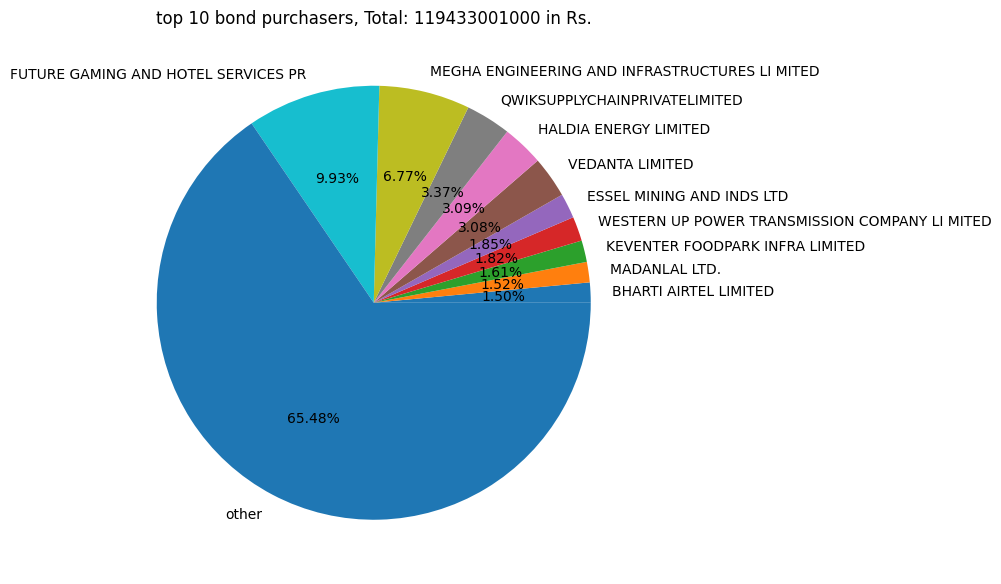

In [ ]:
top = 10

plt.figure(figsize=(7, 10))
plt.pie(list(data_b['Denomination'][-top:]) + [sum(data_b['Denomination'][:-top])],  labels=list(data_b.index[-top:]) + ['other'], autopct='%1.2f%%')
plt.axis(False)

plt.title(f'top 10 bond purchasers, Total: {total} in Rs.')
plt.show()

In [ ]:
data_p = party.groupby('Name of the Political Party')[['Denomination']].sum().sort_values(by=['Denomination'])

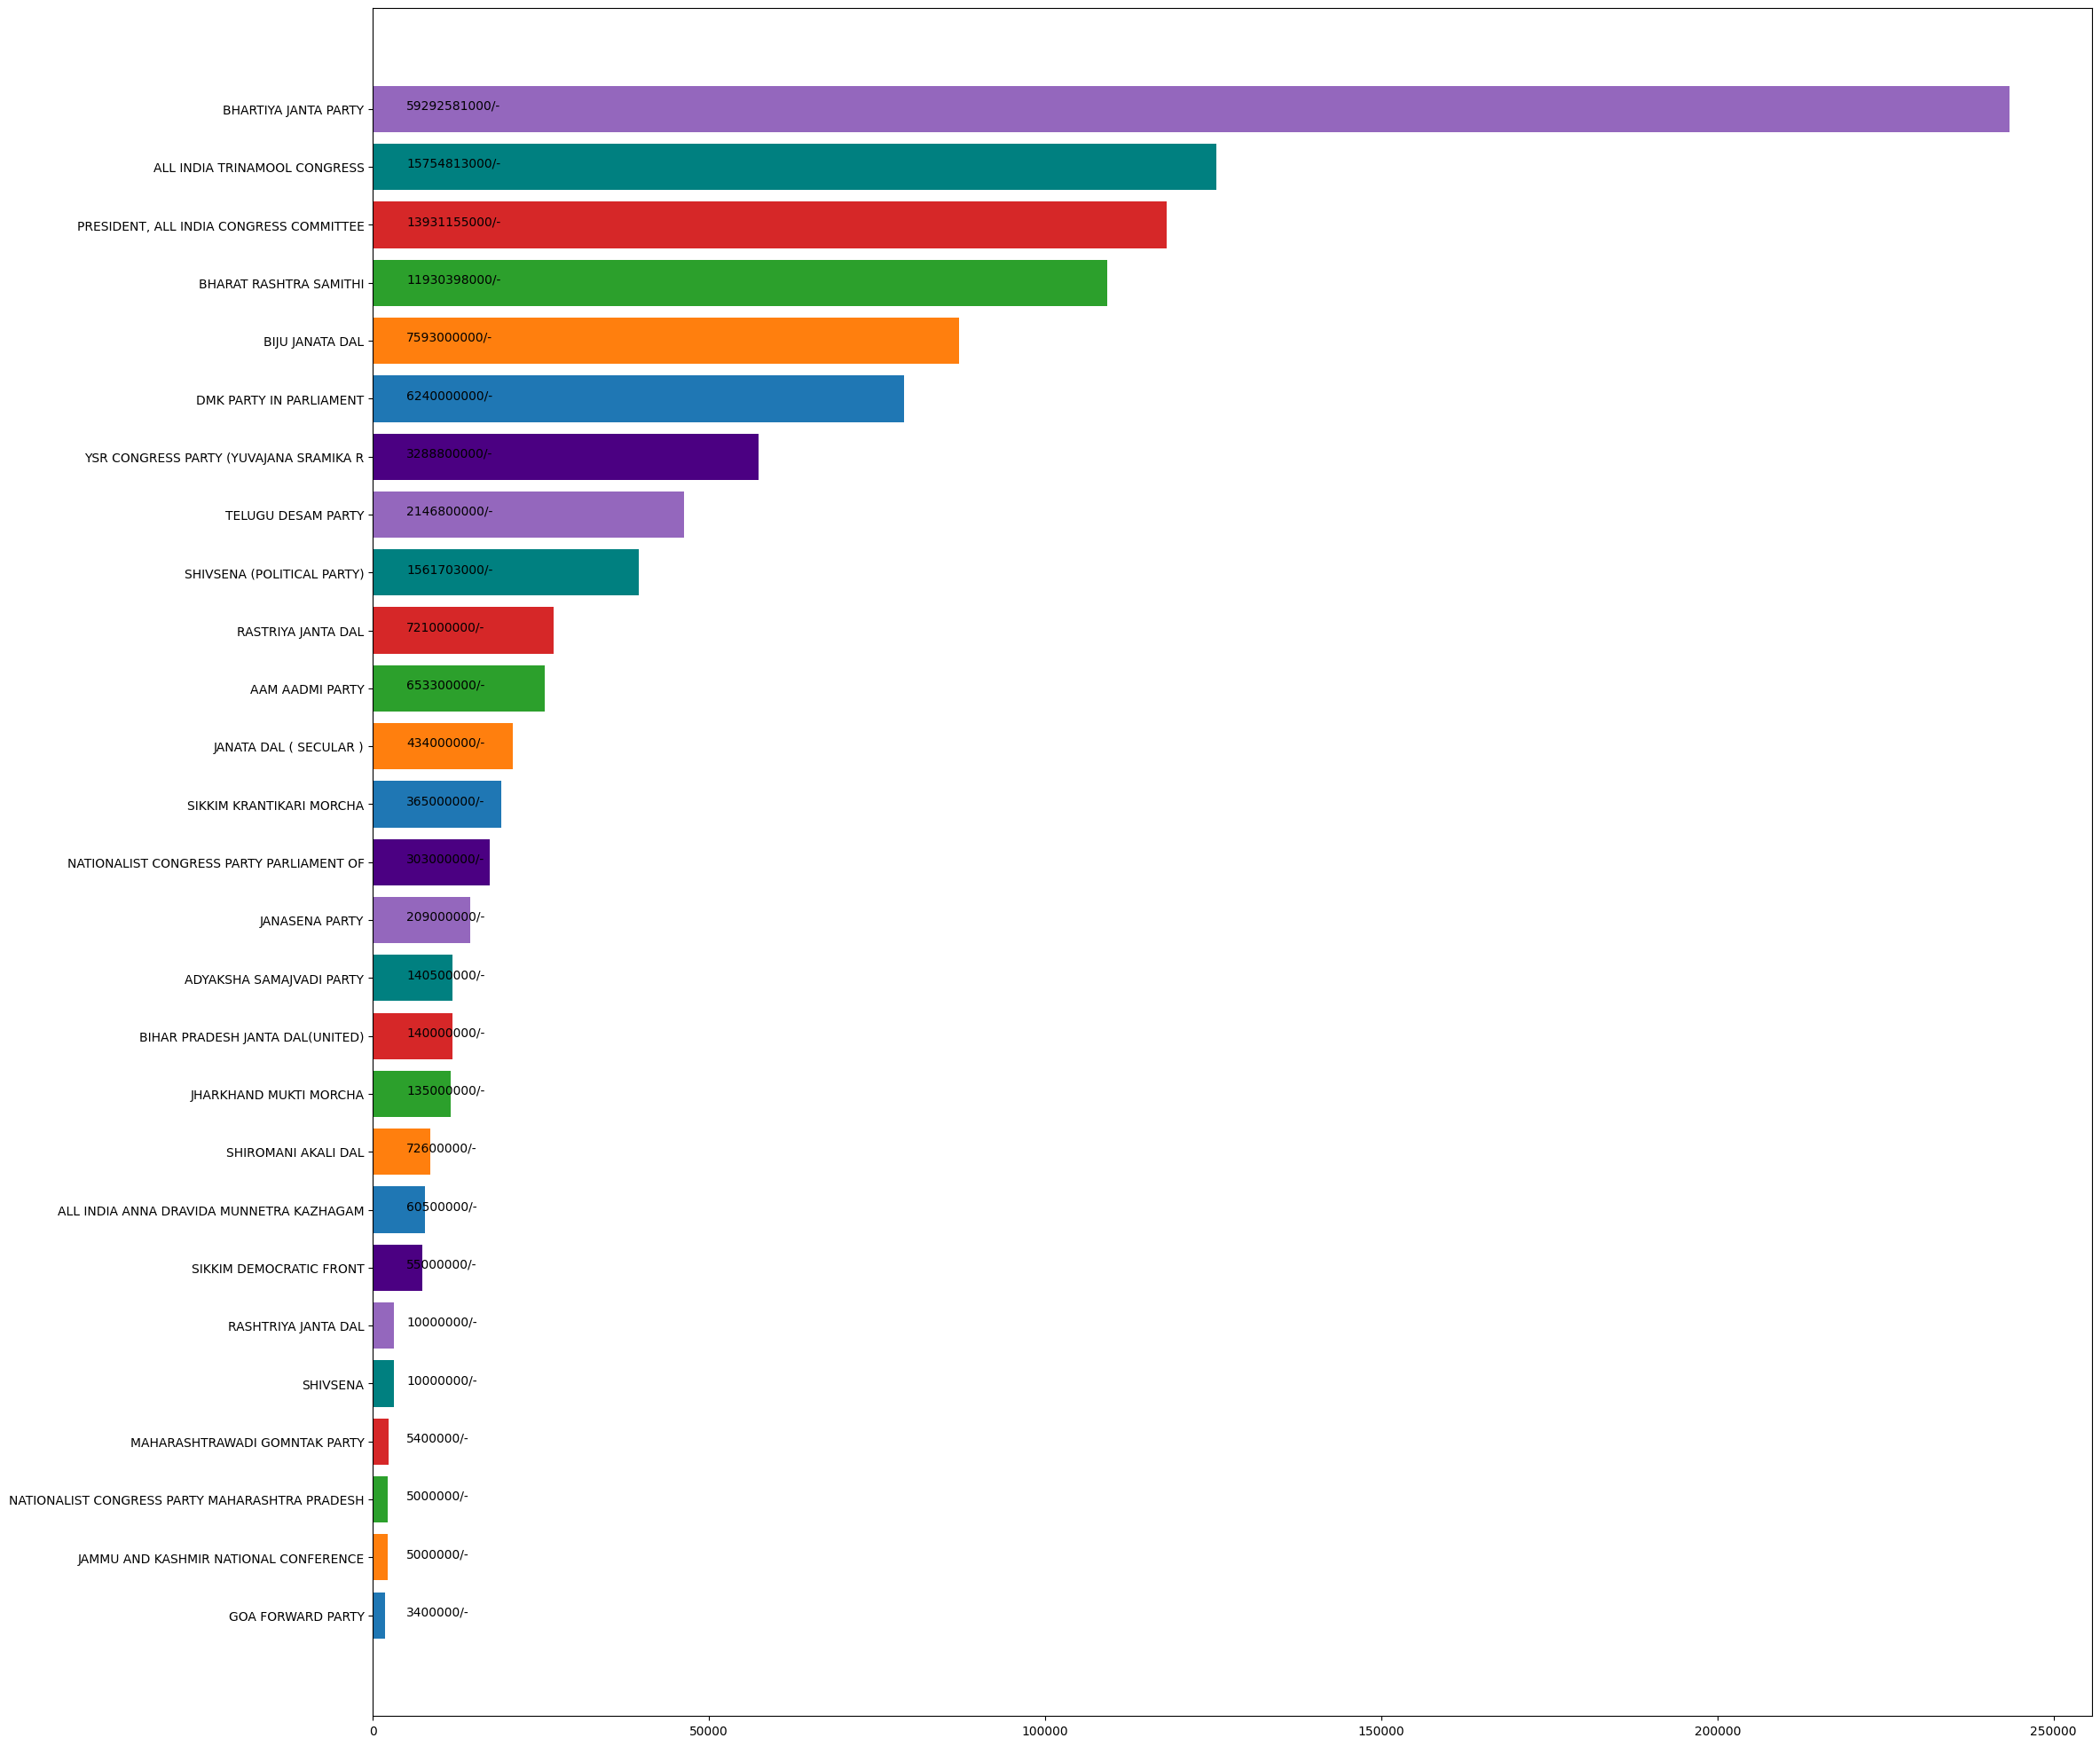

download 1.pdf


In [ ]:
plt.figure(figsize=(25, 25))
plt.barh(list(data_p.index), np.sqrt(list(data_p['Denomination'])), color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red','teal', 'tab:purple', 'indigo'])
for i, value in enumerate(list(data_p['Denomination'])):
  plt.text(5000, i, f'{value}/-')
plt.savefig('1.pdf')
plt.show()
print('download 1.pdf')


In [ ]:
total = 0
for value, freq in dict(party['Denomination'].value_counts()).items():
  total += value*freq

print('Total money Denomination by parties:', total)

Total money Denomination by parties: 125066950000


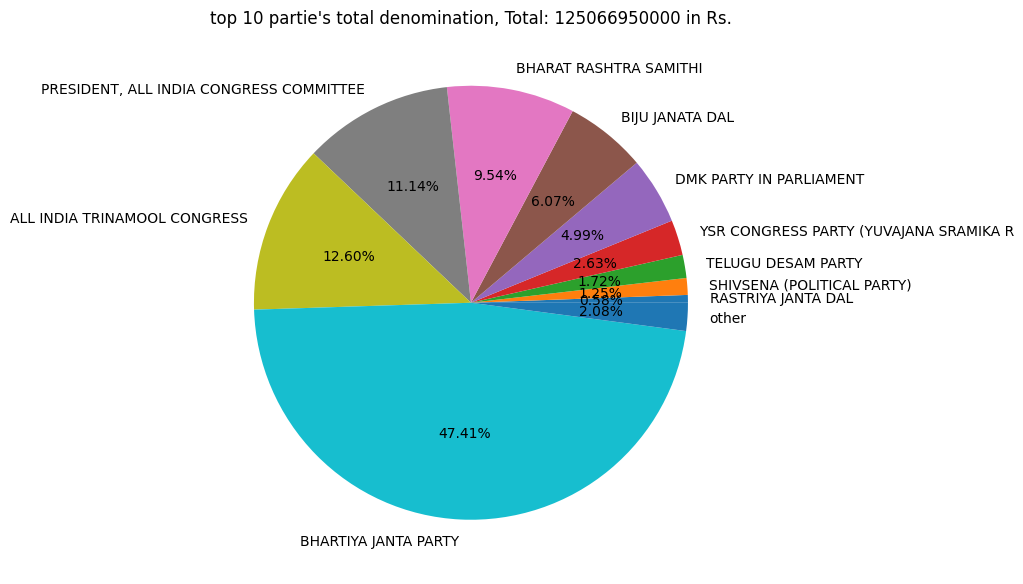

In [ ]:
top = 10

plt.figure(figsize=(7, 10))
plt.pie(list(data_p['Denomination'][-top:]) + [sum(data_p['Denomination'][:-top])],  labels=list(data_p.index[-top:]) + ['other'], autopct='%1.2f%%')
plt.axis(False)

plt.title(f"top {top} partie's total denomination, Total: {total} in Rs.")
plt.show()

In [ ]:
for i, j in y.index:
  print(i)

AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
AAM AADMI PARTY 
ADYAKSHA SAMAJVADI PARTY 
ADYAKSHA SAMAJVADI PARTY 
ADYAKSHA SAMA

In [ ]:
def show_plot(bond_price=1000000000, key = 'BHARATIYA JANATA PARTY '):
  doner = []
  denomination = []

  title = f'Top Doner who donted more then equal to {bond_price} to '+ key

  for (i, j), k in zip(y.index, y['Denominations by company']):
    if i == key and k >= bond_price:
      doner.append(j)
      denomination.append(k)

  data = pd.DataFrame(dict(
    Denomination = denomination,
    doner_name = doner,
  )).sort_values(by=['Denomination'])

  plt.barh(data['doner_name'], data['Denomination'], color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'teal', 'tab:purple'])

  for i, value in enumerate(denomination):
    plt.text(10000000, i, f'{value}/-')

  plt.title( title)
  plt.grid('x', alpha=0.2)
  plt.xlabel('total Demonination by purchaser')
  plt.ylabel('Purchaser')

  plt.savefig(f'{key}.pdf')

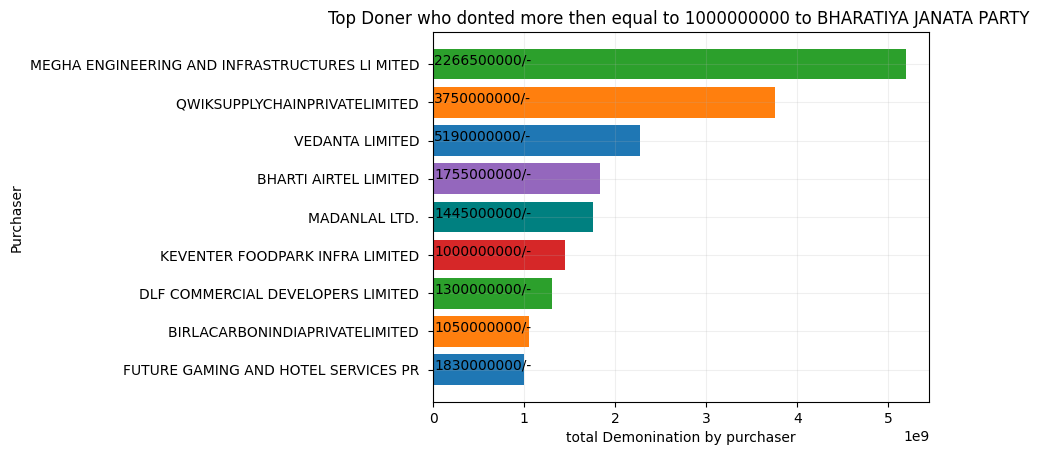

In [ ]:
show_plot(bond_price=1000000000)